<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/SbRcpW).**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [156]:
data = pd.read_csv('../../data/titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [157]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [158]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [159]:
data[(data['Embarked'] == 'C') & (data['Fare'] > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


In [160]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [161]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by=['Fare'], ascending = False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [162]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [163]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [164]:
age_categories = [age_category(age) for age in data.Age]

In [165]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [166]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [167]:
# Ваш код здесь
data.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

In [168]:
# Ваш код здесь
data[(data['Pclass'] == 2) & (data['Sex'] == 'male')].count()

Survived        108
Pclass          108
Name            108
Sex             108
Age              99
SibSp           108
Parch           108
Ticket          108
Fare            108
Cabin             6
Embarked        108
Age_category    108
dtype: int64

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [169]:
data.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1


In [170]:
# Ваш код здесь
print ("Median: %r" % round(data['Fare'].median(), 2))
print ("Standard deviation: %r" % round(np.std(data['Fare']), 2))

Median: 14.45
Standard deviation: 49.67


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [42]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [90]:
# Ваш код здесь
young_survived = data[(data['Age'] < 30) & (data['Survived'] == 1)]['Age_category'].count().astype('float64')
old_survived = data[(data['Age'] > 60) & (data['Survived'] == 1)]['Age_category'].count().astype('float64')

total_young = data[(data['Age'] < 30)]['Age_category'].count().astype('float64')
total_old = data[(data['Age'] > 60)]['Age_category'].count().astype('float64')

total_survived = data[data['Survived'] == 1]['Age_category'].count()

#print ("Under 30: {}".format(round(young_survived / young_not_survived * 100), 2))
#print ("Older 60: {}".format(round(old_survived / old_not_survived * 100), 2))

per_under_30 = round(young_survived / total_young * 100, 1)
per_older_60 = round(old_survived / total_old * 100, 1)

print ("Under 30: {}".format(per_under_30))
print ("Older 60: {}".format(per_older_60))

Under 30: 40.6
Older 60: 22.7


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [91]:
data.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2


In [95]:
# Ваш код здесь
female_survived = data[(data['Sex'] == 'female') & (data['Survived'] == 1)]['Survived'].count().astype('float64')
female_total = data[data['Sex'] == 'female']['Survived'].count().astype('float64')
ratio_female_survived = round(female_survived / female_total * 100, 1)

male_survived = data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Survived'].count().astype('float64')
male_total = data[data['Sex'] == 'male']['Survived'].count().astype('float64')
ratio_male_survived = round(male_survived / male_total * 100, 1)

print (ratio_female_survived)
print (ratio_male_survived)

74.2
18.9


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [299]:
list_ = [name for name in data['Name']]

In [302]:
count_charles = 0
count_thomas = 0
count_william = 0
count_john = 0

for i in range(len(list_)):
    if 'Charles' in list_[i]:
        count_charles += 1
    elif 'Thomas' in list_[i]:
        count_thomas += 1
    elif 'William' in list_[i]:
        count_william += 1
    elif 'John' in list_[i]:
        count_john += 1

In [303]:
print(count_charles)
print(count_thomas)
print(count_william)
print(count_john )

24
21
63
43


In [96]:
data.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1


In [101]:
pd.set_option('display.max_rows', 800)

In [104]:
name = 'Braund, Mr. Owen Harris'

In [120]:
name.find(" ")

7

In [255]:
data['Name'] = data['Name'].astype('category')

In [287]:
df = pd.DataFrame(data['Name'])

In [288]:
def name(x):
    x = x.strip(" ")
    number = x.find('.')
    return x[number+1:]

In [289]:
df = df['Name'].apply(name)

In [290]:
df = pd.DataFrame(df)

In [291]:
df.iloc[0]

Name     Owen Harris
Name: 1, dtype: object

In [294]:
df[df['Name'] == ' Owen Harris']

,Name
PassengerId,
1,Owen Harris


In [269]:
df

,Name
PassengerId,


In [102]:
# Ваш код здесь
data.groupby('Name').count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
Name,,,,,,,,,,,
"Abbing, Mr. Anthony",1,1,1,1,1,1,1,1,0,1,1
"Abbott, Mr. Rossmore Edward",1,1,1,1,1,1,1,1,0,1,1
"Abbott, Mrs. Stanton (Rosa Hunt)",1,1,1,1,1,1,1,1,0,1,1
"Abelson, Mr. Samuel",1,1,1,1,1,1,1,1,0,1,1
"Abelson, Mrs. Samuel (Hannah Wizosky)",1,1,1,1,1,1,1,1,0,1,1
"Adahl, Mr. Mauritz Nils Martin",1,1,1,1,1,1,1,1,0,1,1
"Adams, Mr. John",1,1,1,1,1,1,1,1,0,1,1
"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",1,1,1,1,1,1,1,1,0,1,1
"Aks, Mrs. Sam (Leah Rosen)",1,1,1,1,1,1,1,1,0,1,1


**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

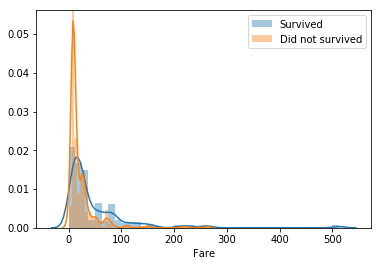

In [217]:
# Ваш код здесь
sns.distplot(data[data['Survived']==1]['Fare'], label = 'Survived')
sns.distplot(data[data['Survived']==0]['Fare'], label = 'Did not survived')
plt.legend()
plt.show()

In [211]:
print ("Did not survive {}".format(data[data['Survived'] == 0]['Age'].mean()))
print ("Survived {}".format(data[data['Survived'] == 1]['Age'].mean()))

Did not survive 30.62617924528302
Survived 28.343689655172415


**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [216]:
data.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1


In [220]:
# Ваш код здесь
data.groupby(['Pclass', 'Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [221]:
data.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64